# Damped Harmonic Oscillator with Noise

This notebook simulates a damped harmonic oscillator by numerically solving the
equations of motion and then adding Gaussian noise to represent experimental
measurement uncertainty.

The goal is to illustrate how a clean physical signal is distorted by noise,
and how both can be visualized clearly using Python.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1 
b = 0.3
k = 1.0

## Damped Harmonic Oscillator Model

We model the system as a one-dimensional damped harmonic oscillator governed by
Newton’s second law:

$$
m \frac{d^2 x}{dt^2} + b \frac{dx}{dt} + k x = 0,
$$

where $x(t)$ is the position, $m$ is the mass, $b$ is the damping coefficient,
and $k$ is the spring constant.

To solve this equation numerically, we rewrite it as a system of first-order
ordinary differential equations by defining the velocity $v = \dot{x}$:

$$
\begin{aligned}
\dot{x} &= v, \\
\dot{v} &= -\frac{b}{m} v - \frac{k}{m} x.
\end{aligned}
$$

This first-order system is then integrated using
`scipy.integrate.solve_ivp`.


In [4]:
def damped_oscl(t,y):
    x, v = y 
    dxdt = v
    dvdt = -(b/m)*v - (k/m)*x
    return [dxdt, dvdt]

In [13]:
#create a grid of time values to solve our equation over
t_grid = np.linspace(0,100,500)

#Set initial conditions for position (1 m) and velocity (0 m/s). 
y0=[1,0]

sol=solve_ivp(damped_oscl, (t_grid[0], t_grid[-1]), y0, t_eval=t_grid)

t=sol.t
x=sol.y[0]
v=sol.y[1]

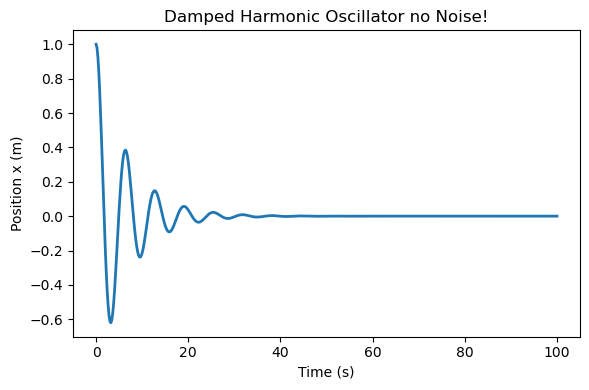

In [15]:
plt.figure(figsize=(6,4))
plt.plot(t_grid, x, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Position x (m)")
plt.title("Damped Harmonic Oscillator no noise")
plt.tight_layout()
plt.show()

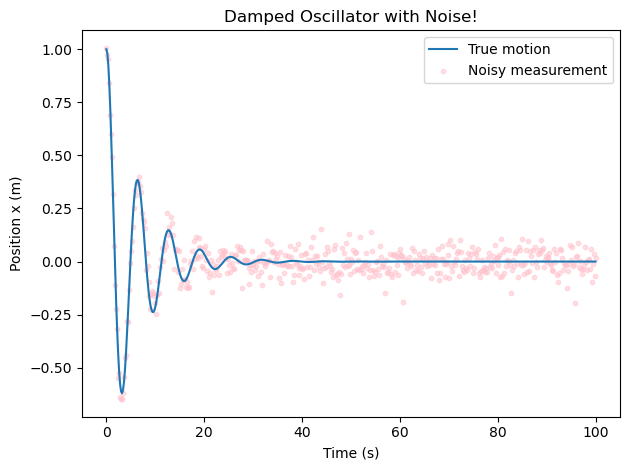

In [27]:
rng = np.random.default_rng(0)
# Add zero mean Gaussian measurement noise with standard deviation of 0.05
# to simulate experimental uncertainty in position measurements
noise_level = 0.05
x_noisy = x + rng.normal(0, noise_level, size=len(x))
plt.plot(t, x, label="True motion")
plt.scatter(t, x_noisy, s=10, alpha=0.5, color='pink', label="Noisy measurement")
plt.xlabel("Time (s)")
plt.ylabel("Position x (m)")
plt.title("Damped Oscillator with noise!")
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
import os
# Create directory for output figures (if it does not already exist)
os.makedirs("figures", exist_ok=True)

plt.figure(figsize=(6,4))
plt.plot(t, x, linewidth=2, label="True motion")
plt.scatter(t, x_noisy, s=10, alpha=0.5, label="Noisy measurement")
plt.xlabel("Time (s)")
plt.ylabel("Position x (m)")
plt.title("Damped Oscillator: Signal + Noise")
plt.legend()
plt.tight_layout()
plt.savefig("figures/damped_oscillator.png", dpi=300)
plt.close()

print("Saved: figures/damped_oscillator.png")


Saved: figures/damped_oscillator.png
